<h1>Conspiracy Dataset</h1>
<p>Dans ce dataset, je vais analyser encore une fois les topics, et finir par entrainer un ou plusieurs modèles de Huggingface</p>
<h3>Topic modeling 2

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import re, os, ast, nltk

# Gensim
import gensim
from gensim import corpora
# Vis
import pyLDAvis
import pyLDAvis.gensim_models

In [44]:
# Main dataframe without NaN
df = pd.read_csv('texts.csv').dropna()
# Only arabic characters (no punctuations too)
df['txt'] = df.texts.progress_map(lambda x : ' '.join(re.findall(r'[\u0600-\u06FF]+', x)))
# Drop empty values (FINAL DF)
df = df.replace(r'^\s*$', np.nan, regex=True).dropna()
df.head(6)

100%|██████████| 51087/51087 [00:00<00:00, 106660.17it/s]


,texts,txt
0,قال تعالى(إنّهُم يَرَوْنَهُ بعيداًونَراهُ قريبا),قال تعالى إنّهُم يَرَوْنَهُ بعيداًونَراهُ قريبا
1,الجيش الروسي يباد في مدينة إيربين الآن,الجيش الروسي يباد في مدينة إيربين الآن
2,لم يتبقى الا سنوات قليلة..\nhttps://t.me/orkSu...,لم يتبقى الا سنوات قليلة
7,لم نسمع منذ فترة عن هجمات داعش في افغانستان \n...,لم نسمع منذ فترة عن هجمات داعش في افغانستان سي...
8,الولايات المتحدة تخطط لدعم طالبان ضد داعش 🔴\n\...,الولايات المتحدة تخطط لدعم طالبان ضد داعش مسرح...
9,#للتذكير,للتذكير


In [1]:
# Arabic stopwords
# !pip install arabic-stopwords
import arabicstopwords.arabicstopwords as stp
stopwords = list(stp.stopwords_list()) + nltk.corpus.stopwords.words('arabic')
stopwords.extend(['ان','فى','يا','ا','ال','او','ء','نتا','انا','اي','؟','،'])

In [25]:
texts_2 = [[i for i in text if i not in stopwords] for text in tqdm(lemmatized)]

100%|██████████| 32662/32662 [02:42<00:00, 201.21it/s]


In [28]:
dictionary = corpora.Dictionary(texts_2)
doc_word_matrix = [dictionary.doc2bow(text) for text in texts_2]

<h5>Nombre de sujets : 4, en fonction du niveau de cohérence</h5>

In [29]:
LDA = gensim.models.ldamodel.LdaModel
lda_model_4 = LDA(corpus=doc_word_matrix, id2word=dictionary, num_topics=4, random_state=33, chunksize=1000, passes=4, iterations=2)

In [30]:
lda_model_4.print_topics()

[(0,
  '0.008*"بشر" + 0.006*"ناس" + 0.005*"موت" + 0.005*"أطفال" + 0.004*"قانون" + 0.004*"جبى" + 0.004*"قدم" + 0.004*"عمل" + 0.004*"صحة" + 0.004*"كون"'),
 (1,
  '0.049*"الله" + 0.016*"قال" + 0.009*"علم" + 0.008*"ناس" + 0.007*"حق" + 0.006*"أرض" + 0.005*"مسلم" + 0.005*"الارض" + 0.005*"صلى" + 0.005*"يوم"'),
 (2,
  '0.008*"حال" + 0.007*"تم" + 0.006*"فيروس" + 0.006*"يم" + 0.005*"ملقح" + 0.005*"عام" + 0.005*"شكل" + 0.005*"سبب" + 0.005*"يوم" + 0.004*"قلب"'),
 (3,
  '0.062*"لقاح" + 0.030*"عالم" + 0.020*"قناة" + 0.010*"دكتور" + 0.010*"كار" + 0.010*"رافض" + 0.009*"صحة" + 0.009*"جديد" + 0.008*"توعية" + 0.008*"ضد"')]

In [31]:
pyLDAvis.enable_notebook()
vis_4 = pyLDAvis.gensim_models.prepare(topic_model=lda_model_4, corpus=doc_word_matrix, dictionary=dictionary)

C:\Users\zacke\AppData\Local\Programs\Python\Python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\zacke\AppData\Local\Programs\Python\Python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\zacke\AppData\Local\Programs\Python\Python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [34]:
vis_4

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.071096  0.182840       1        1  27.259288
1     -0.289269 -0.099471       2        1  25.752852
0      0.011729  0.126144       3        1  23.624356
3      0.206445 -0.209512       4        1  23.363503, topic_info=      Term          Freq         Total Category  logprob  loglift
400   لقاح  12531.000000  12531.000000  Default  30.0000  30.0000
116   الله  10770.000000  10770.000000  Default  29.0000  29.0000
78    عالم   6057.000000   6057.000000  Default  28.0000  28.0000
375   قناة   4060.000000   4060.000000  Default  27.0000  27.0000
2      قال   3575.000000   3575.000000  Default  26.0000  26.0000
...    ...           ...           ...      ...      ...      ...
54     دول    820.870635   1566.115052   Topic4  -5.4864   0.8080
1330  حقيق    782.136575   1401.115927   Topic4  -5.5347   0.8710
1016  جرعة    781.688894   1514.274398   Topic4  -5.5353   0.7928
291    سبب    767.312045   2538.271053   Topic4  -5.5538   0.2577
28     الى    668.067752   1405.982138   Topic4  -5.6924   0.7099

[280 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
556       1  0.995631   آثار
556       3  0.003386   آثار
1854      1  0.997067  أجهزة
740       1  0.020927   أحمى
740       2  0.011958   أحمى
...     ...       ...    ...
112       3  0.035930    يوم
112       4  0.192943    يوم
1008      1  0.981194      ٪
1008      3  0.002393      ٪
1008      4  0.016752      ٪

[533 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])

<h4>Coherence test

In [35]:
# Coherence model
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start=1; limit=25; step=1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_word_matrix, texts=texts_2, start=start, limit=limit, step=step)

100%|██████████| 24/24 [09:51<00:00, 24.63s/it]


C:\Users\zacke\AppData\Roaming\Python\Python39\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


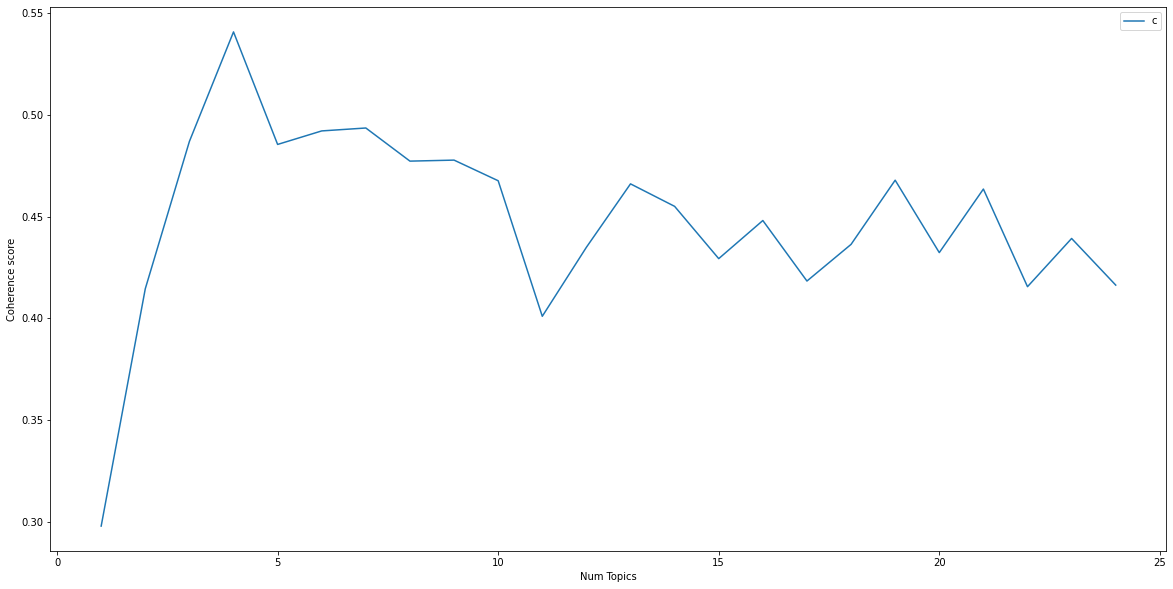

1 :  0.29797869504195545
2 :  0.41457314908741827
3 :  0.48692765558735784
4 :  0.5407323138417549
5 :  0.4854575794285827
6 :  0.49209778355308575
7 :  0.4935307604790972
8 :  0.47725665359199376
9 :  0.4777540737367036
10 :  0.46761789640990337
11 :  0.4010374144079234
12 :  0.434938210900329
13 :  0.46608680099376465
14 :  0.4550443539443282
15 :  0.42936049894804734
16 :  0.4480819295028121
17 :  0.41835299038567847
18 :  0.4363635469290938
19 :  0.46788908049008565
20 :  0.4323220220559829
21 :  0.4635449307937441
22 :  0.41558148193446715
23 :  0.43926559049652764
24 :  0.41636041412069497


In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores
for i, el in enumerate(x):
    print(el,': ', coherence_values[i])

# # is the best based on a scale of 20 iterations

In [40]:
vis_4

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.071096  0.182840       1        1  27.259288
1     -0.289269 -0.099471       2        1  25.752852
0      0.011729  0.126144       3        1  23.624356
3      0.206445 -0.209512       4        1  23.363503, topic_info=      Term          Freq         Total Category  logprob  loglift
400   لقاح  12531.000000  12531.000000  Default  30.0000  30.0000
116   الله  10770.000000  10770.000000  Default  29.0000  29.0000
78    عالم   6057.000000   6057.000000  Default  28.0000  28.0000
375   قناة   4060.000000   4060.000000  Default  27.0000  27.0000
2      قال   3575.000000   3575.000000  Default  26.0000  26.0000
...    ...           ...           ...      ...      ...      ...
54     دول    820.870635   1566.115052   Topic4  -5.4864   0.8080
1330  حقيق    782.136575   1401.115927   Topic4  -5.5347   0.8710
1016  جرعة    781.688894   1514.274398   Topic4  -5.5353   0.7928
291    سبب    767.312045   2538.271053   Topic4  -5.5538   0.2577
28     الى    668.067752   1405.982138   Topic4  -5.6924   0.7099

[280 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
556       1  0.995631   آثار
556       3  0.003386   آثار
1854      1  0.997067  أجهزة
740       1  0.020927   أحمى
740       2  0.011958   أحمى
...     ...       ...    ...
112       3  0.035930    يوم
112       4  0.192943    يوم
1008      1  0.981194      ٪
1008      3  0.002393      ٪
1008      4  0.016752      ٪

[533 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])

<h3>Conclusion</h3>
<h5>Sur 4 topics:</h5>
<p>Sur la base de cet ensemble de données et de la visualisation des thèmes, nous pouvons diviser les données en 3 ou 4 thèmes, dont 2 sont étroitement liés. (topic 1 and 3).
<li><b>Topic 1 & 3: </b>Ces deux sujets traitent une problématique qui gravite autour de la mort, la situation, la population, le covid et la santé 
<li><b>Topic 2: </b>Ce topic a une touche religieuse et fait un lien entre la religion, la science et dieu
<li><b>Topic 4: </b>Le topic 4 est plus scientifique, on le constate avec certains mots comme (vaccin: لقاح) - (scientifique: عالم) - (doctor: دكتور)...<br>

In [39]:
pyLDAvis.save_html(vis_4, 'conspiracy_topics.html')